0 cost=  2580.7568106131644
1 cost=  2342.825364770137
2 cost=  2164.965594826576
3 cost=  2251.772864955726
4 cost=  2199.73385570841
5 cost=  2100.916864552655
6 cost=  2220.1362679184126
7 cost=  2322.15732523325
8 cost=  2226.5899606374946
9 cost=  2055.8234484287345
10 cost=  2211.556377772565
11 cost=  2232.2482871269917
12 cost=  1907.1666902342542
13 cost=  2118.078040949868
14 cost=  2099.7203476073378
15 cost=  2169.265798196514
16 cost=  2020.4108998484344
17 cost=  2075.999150795748
18 cost=  2002.1766211135905
19 cost=  2221.8603732659076
20 cost=  1913.017790703704
21 cost=  2181.055621558773
22 cost=  2155.380489222027
23 cost=  2220.4752313967333
24 cost=  2030.4495445020348
25 cost=  2088.4866114123247
26 cost=  2087.916806861912
27 cost=  2151.668459918467
28 cost=  1992.7859654603176
29 cost=  2069.0884248167818
30 cost=  2276.796235845981
31 cost=  2089.4073317365305
32 cost=  1991.6855152978192
33 cost=  2076.3553234837086
34 cost=  2321.9280979697846
35 cost=  197

 479.3664352618316
499 cost=  479.44432946633935
500 cost=  479.44432946633935
501 cost=  479.62033845838357
[0, 44, 91, 3, 45, 42, 56, 49, 59, 85, 40, 89, 1, 51, 12, 58, 66, 10, 43, 5, 80, 21, 73, 55, 18, 72, 81, 34, 22, 19, 46, 26, 39, 20, 53, 16, 32, 97, 74, 82, 64, 83, 64, 83, 15, 70, 47, 8, 24, 48, 67, 41, 36, 27, 76, 75, 60, 84, 29, 96, 50, 2, 31, 90, 69, 98, 25, 23, 7, 61, 63, 87, 13, 95, 9, 57, 65, 11, 38, 33, 68, 62, 54, 71, 86, 6, 28, 17, 92, 14, 30, 94, 77, 93, 37, 99, 35, 88, 79, 52, 78, 52, 78, 4, 0]
total distance sum: 479.31348611250075


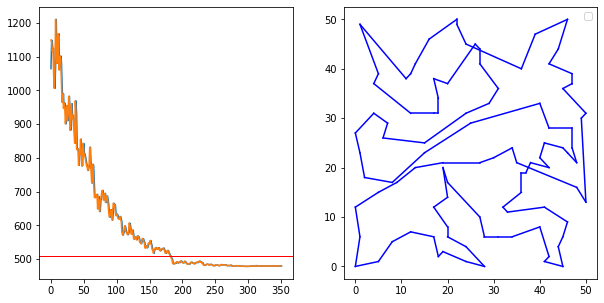

In [ ]:
import pandas as pd
import math
import sys
import copy
import numpy as np
import random
import matplotlib.pyplot as plt


def euclidean_distance(a, b):
    distance = 0
    for i in range(len(a)):
        distance += (a[i] - b[i]) ** 2
    return distance ** 0.5


def make_distance(dist):
    for i in range(len(g)):
        for j in range(len(g)):
            dist[i].append(euclidean_distance(g[i], g[j]))
        # dist[i].insert(i, 0)
    return dist


class Coord:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    @staticmethod
    def get_distance(a, b):
        return np.sqrt((np.abs(a.x-b.x)**2)+(np.abs(a.y-b.y)**2))

    @staticmethod
    def get_total_distance(coords):
        distance = 0
        for first, second in zip(coords[:-1], coords[1:]):
            distance += Coord.get_distance(first, second)
        distance += Coord.get_distance(coords[0], coords[-1])
        return distance

if __name__ == "__main__":
    data = pd.read_csv("Input_data.csv")
    graph = data[data.columns.difference(['NO.'])]
    graph2 = data.to_numpy()
    g = graph.to_numpy()
    coords = []
    cur_solution = []
    best_solution = []
    for i in range(len(g)):
        coords.append(Coord(g[i][0], g[i][1]))

    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    #SA
    cost_init = Coord.get_total_distance(coords)
    SUM = 0
    T = 30
    factor = 0.99
    T_init = 100000
    BR = True
    # 외부 루프 (이웃값 비교 업데이트)
    for i in range(T_init):
        print(i, 'cost= ', cost_init)
        cur_solution.append(cost_init)
        T = T * factor
        for j in range(int(T_init/100)): # 내부루프 (평형상태까지..)
            # 좌표 교환 및 새 이웃 구하기
            r1, r2 = np.random.randint(0, len(coords), size=2)

            coords[r1], coords[r2] = coords[r2], coords[r1]

            # 비용 구하기
            cost1 = Coord.get_total_distance(coords)

            # 비용이 작으면 새로운 해(비용)를 사용
            if cost1 < cost_init:
                cost_init = cost1
            # 비용이 크면 일정확률로 바꿈
            else:
                # 균일한 분포 데이터를 만들기 위해
                x = np.random.uniform()
                if x < np.exp((cost_init - cost1)/T):
                    cost_init = cost1
                else:

                    coords[r1], coords[r2] = coords[r2], coords[r1]
            if i > 500 and cost_init < 510 or T < 0.00000001:
                BR = False
        if not BR:
            break
        best_solution.append(cost_init)



    # 결과 그리기
    for first, second in zip(coords[:-1], coords[1:]):
        ax2.plot([first.x, second.x], [first.y, second.y], 'b')
    ax2.plot([coords[0].x, coords[-1].x], [coords[0].y, coords[-1].y], 'b')
    res = []
    path = []

    for c in coords:
        res.append([c.x, c.y])

    for i in range(len(res)):
        for j in range(len(g)):
            if res[i][0] == g[j][0] and res[i][1] == g[j][1]:
                path.append(j)

    mark = path.index(0)
    front = path[:mark]
    back = path[mark:]
    marked_path = back + front
    marked_path.append(0)
    # 원점부터 시작하는 경로
    print(marked_path)
    print("total distance sum:", cost_init)
    ax1.plot(cur_solution[150:], label='current solution')
    ax1.plot(best_solution[150:], label='best solution')
    ax1.axhline(y=510, color='r', linewidth=1)
    ax1.legend()
    plt.show()